In [629]:
import pandas as pd

In [630]:
df2 = pd.read_csv(r'C:\Users\YUCHENG WANG\Desktop\MBAN Summer\MBAN6110\Data\sales_data.csv')

In [631]:
df2

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [632]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [633]:
df2.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [ ]:
#I find some data is missing is this dataset,using df2.isnull() to identifty whether the data is really missing.

In [ ]:
#Then, I try to draw the histgram and boxplot to identify whether there's any outlier in this dataset, if it does, I will drop it.

In [634]:
import seaborn as sns

<Axes: xlabel='Price', ylabel='Count'>

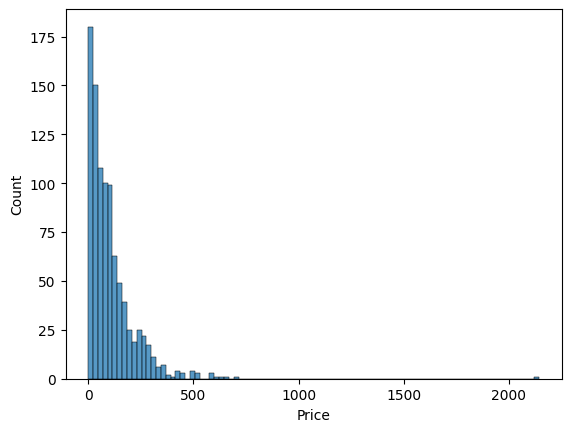

In [635]:
sns.histplot(df2['Price'])

<Axes: >

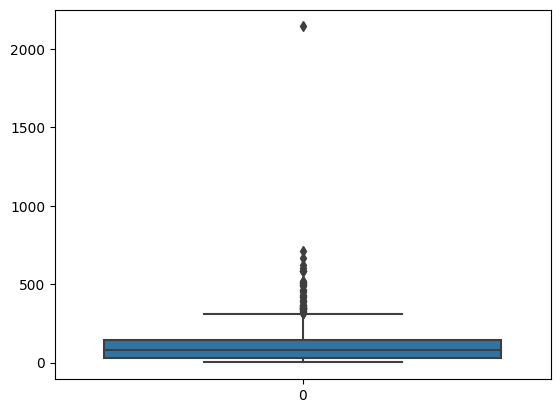

In [636]:
sns.boxplot(df2['Price'])

In [ ]:
#here, form the graph we can see that there's an obviously outlier which price is larger than 2000, I will find it and drop it

In [637]:
df2[df2['Price'] >= 2000]

,Product,Region,Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.3,5.0,2024-08-27


In [638]:
df2.drop(969, axis=0, inplace=True )

<Axes: >

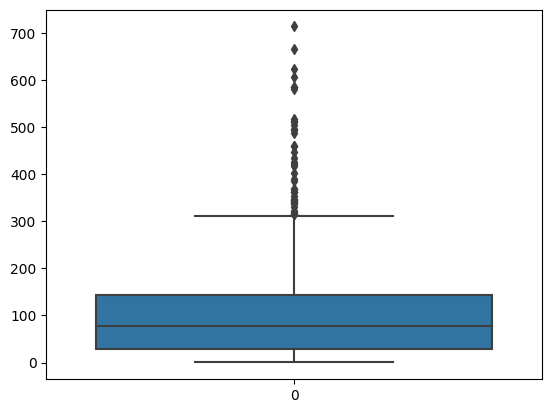

In [639]:
sns.boxplot(df2['Price'])

<Axes: xlabel='Price', ylabel='Count'>

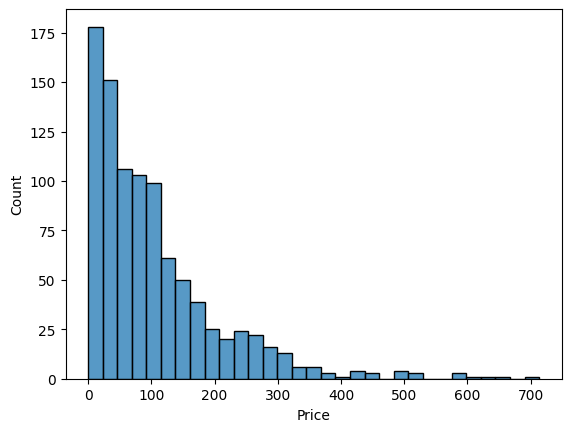

In [640]:
sns.histplot(df2['Price'])

In [642]:
df2.isnull()

,Product,Region,Price,Units Sold,Sale Date
0,True,False,False,False,False
1,True,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1045,False,False,False,False,False
1046,False,False,True,False,False
1047,False,False,False,False,False
1048,True,False,True,False,False


In [643]:
# Above shows there are several missings in this data set, now I wanna know the exact total amount of missing values this dataset. Amd try to fill the missing value
# with 'Other' in variable 'Product' and 'Region'

In [644]:
df2['Product'] = df2['Product'].fillna('Other')

In [645]:
df2['Region'] = df2['Region'].fillna('Other')

In [646]:
df2.isnull().sum()

Product         0
Region          0
Price         105
Units Sold    104
Sale Date       0
dtype: int64

In [ ]:
# Now, the missing value in variable 'Product' and 'Region' was filled by 'Other',the null item here is all '0'. However, we still can see that there's
# about 105 unit missing data in 'Price' and 'Unis Sold',which is very important to our following analysis.

In [647]:
# Then I will drop the potential duplicates in this dataset before I start to fill the remaining two variables
df2.drop_duplicates(inplace=True)

In [648]:
# This step, I deicide to fill the mean price of each product into the null item.
df2.groupby('Product')['Price'].mean()

Product
Other         103.991348
Product_1      89.652857
Product_10     61.264286
Product_11     75.495385
Product_12     92.660000
Product_13     88.530000
Product_14    127.552778
Product_15     86.412857
Product_16    104.196471
Product_17     96.859412
Product_18     67.986154
Product_19    123.740000
Product_2     133.226875
Product_20    143.814167
Product_21     91.728667
Product_22    114.403333
Product_23    106.473000
Product_24    109.566923
Product_25    110.250000
Product_26    192.085455
Product_27     78.409286
Product_28     83.395333
Product_29    135.385789
Product_3      59.752000
Product_30    124.420000
Product_31    145.119524
Product_32     90.475000
Product_33     83.993750
Product_34    133.865000
Product_35    138.106250
Product_36     80.066667
Product_37     83.212222
Product_38     73.692308
Product_39    114.698889
Product_4      83.006842
Product_40    150.797000
Product_41    154.682000
Product_42     76.066875
Product_43     62.914000
Product_44     96

In [756]:
df2['Price'] = df2['Price'].fillna(df2.groupby('Product')['Price'].transform('mean'))

In [757]:
df2['Price']

0       75.96
1      175.78
2       20.43
3       12.77
4      125.69
        ...  
995     31.83
996     46.19
997    311.80
998     43.44
999     56.95
Name: Price, Length: 999, dtype: float64

In [758]:
df2['Price'].info()

<class 'pandas.core.series.Series'>
Index: 999 entries, 0 to 999
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
999 non-null    float64
dtypes: float64(1)
memory usage: 15.6 KB


In [761]:
# Agian, I repeat the procedure I did in the 'Price' step that I fill the null item with mean unit of each product in the 'Unit Sold' column, the result indiacted that 
# all the null item was been filled
df2.groupby('Product')['Units Sold'].mean()

Product
Other          9.796607
Product_1      9.919726
Product_10    11.192088
Product_11    10.949547
Product_12    10.692308
Product_13    10.547785
Product_14    10.639307
Product_15    10.952602
Product_16    10.277778
Product_17     9.837412
Product_18    10.158589
Product_19    10.000000
Product_2     10.586675
Product_20    10.209789
Product_21    11.214683
Product_22     9.881350
Product_23    10.292706
Product_24    10.196677
Product_25     9.416083
Product_26     9.916667
Product_27    10.759177
Product_28    10.379588
Product_29     9.811012
Product_3     11.636364
Product_30    10.755090
Product_31     9.952381
Product_32     9.062500
Product_33     9.150867
Product_34    10.239613
Product_35     9.793338
Product_36     9.011295
Product_37     9.635443
Product_38     9.401557
Product_39     8.508157
Product_4     10.568409
Product_40     9.207341
Product_41    10.352941
Product_42     9.541772
Product_43    10.655366
Product_44     9.623347
Product_45     9.140556
Product_

In [762]:
df2['Units Sold'] = df2['Units Sold'].fillna(df2['Units Sold'].mean())

In [763]:
df2['Units Sold']

0      10.0
1       8.0
2      12.0
3      10.0
4       6.0
       ... 
995    13.0
996     9.0
997    13.0
998    15.0
999     6.0
Name: Units Sold, Length: 999, dtype: float64

In [764]:
df2['Units Sold'].info()

<class 'pandas.core.series.Series'>
Index: 999 entries, 0 to 999
Series name: Units Sold
Non-Null Count  Dtype  
--------------  -----  
999 non-null    float64
dtypes: float64(1)
memory usage: 15.6 KB


In [ ]:
# For the following analysis, I create a new column called 'Sales' which equal to 'Price' * 'Units Sold' for each column

In [661]:
df2['Sales'] = df2['Price'] * df2['Units Sold']

In [662]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     999 non-null    object 
 1   Region      999 non-null    object 
 2   Price       999 non-null    float64
 3   Units Sold  999 non-null    float64
 4   Sale Date   999 non-null    object 
 5   Sales       999 non-null    float64
dtypes: float64(3), object(3)
memory usage: 54.6+ KB


In [663]:
df2.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date,Sales
count,999,999,999.000000,999.000000,999,999.000000
unique,51,11,NaN,NaN,999,NaN
top,Other,Region_9,NaN,NaN,2022-01-01,NaN
freq,100,104,NaN,NaN,1,NaN
mean,NaN,NaN,103.927405,10.073415,NaN,1033.750653
std,NaN,NaN,98.540890,3.000861,NaN,1048.990200
min,NaN,NaN,0.200000,2.000000,NaN,0.990000
25%,NaN,NaN,33.650000,8.000000,NaN,299.000000
50%,NaN,NaN,83.395333,10.000000,NaN,772.622857
75%,NaN,NaN,135.835000,12.000000,NaN,1370.945000


In [664]:
# copy a new dataset from df2 which only inculde the variable that I need 
df3=df2[['Product','Region','Units Sold','Sales']]

In [665]:
# sort the region in an ascending order
region_sort = df3.sort_values('Region', ascending=True)

In [666]:
# Then based on the sorted dataset sort again in 'Sales' in a descending order
region_sales_sort= region_sort.sort_values('Sales', ascending=False)

In [667]:
print(region_sales_sort)

        Product    Region  Units Sold        Sales
437  Product_26  Region_8   13.000000  7607.210000
814  Product_26  Region_2   12.000000  7483.200000
853  Product_41  Region_1   10.000000  7132.900000
119  Product_35     Other   16.000000  6420.960000
789   Product_7     Other   10.073415  6103.179889
..          ...       ...         ...          ...
486       Other  Region_2    8.000000     4.640000
456  Product_26  Region_4   14.000000     2.800000
347   Product_9  Region_5    9.000000     2.790000
201  Product_24  Region_4   10.000000     2.200000
397  Product_10  Region_9    3.000000     0.990000

[999 rows x 4 columns]


# we can see that from the sorted data result and the folowing graph,region 8,2,1 has the highest unit sales with product 26 and 41 among these regions, 
# so the company should take a look on these products in these particular regions for next year's strategy

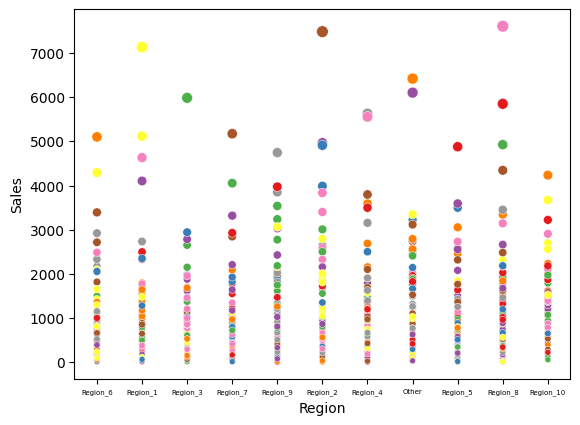

In [766]:
import matplotlib.pyplot as plt
sns.scatterplot(data=df3, x='Region', 
                          y='Sales',
                          hue='Sales',
                          palette='Set1', 
                          size='Sales', 
                          legend=False)
plt.xticks(fontsize=5)
plt.show()

In [730]:
# This step, I decide to use groupby and sort to fliter the sum of sales in each product and region in a descending order
Sales_region = df3.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()

In [731]:
print(Sales_region)

       Region          Sales
0    Region_9  111492.789189
1    Region_8  110035.422560
2       Other  107388.916921
3    Region_4  103397.190952
4   Region_10  103280.531378
5    Region_2   99475.529972
6    Region_5   90497.014271
7    Region_1   85832.088944
8    Region_3   81091.432190
9    Region_6   75016.827505
10   Region_7   65209.158919


In [716]:
import matplotlib.pyplot as plt

In [732]:
plt.figure(figsize=(12, 12)) 

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

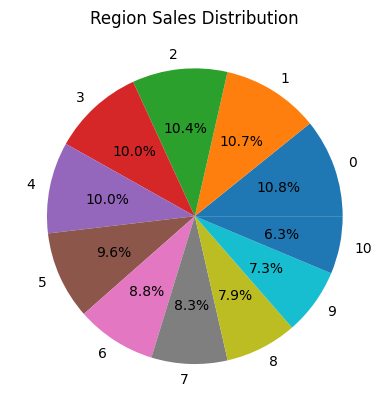

In [733]:
plt.pie(Sales_region['Sales'], labels=Sales_region.index, autopct='%1.1f%%')
plt.title('Region Sales Distribution')
plt.show()

from the sorted value and the pie chart, despite the missing data 'Other', we can seperate these regions by 2, which is Top 5 sales regions : Region[ 9,8,4,10,2]
Low 5 sales regions:Region[5,1,3,6,7]

In [678]:
# Now I will do an analyze to get the top 5 product selling and the lowest 5 producting selling among these two regions

In [780]:
top_5 = ['Region_9', 'Region_8','Region_4','Region_10','Region_2','Other'] 

In [781]:
top5_df2 = df2[df2['Region'].isin(top_5)]

In [806]:
top5_df2 = top5_df2.groupby('Product')['Sales'].sum().sort_values(ascending=False).reset_index()

In [807]:
print(top5_df2)

       Product         Sales
0        Other  99530.641405
1   Product_30  30696.607686
2   Product_31  30068.490000
3   Product_14  27109.303356
4   Product_50  26807.668951
5   Product_40  26715.561780
6   Product_35  26528.022307
7   Product_29  26522.786195
8   Product_41  26154.222000
9    Product_7  25740.041087
10   Product_2  25523.837857
11  Product_45  25477.779261
12  Product_26  24353.272727
13  Product_48  23675.400000
14  Product_20  23191.474165
15  Product_34  22590.866151
16  Product_23  22156.068261
17  Product_16  21980.740588
18  Product_19  21510.220000
19   Product_1  20935.031236
20  Product_33  20861.083783
21   Product_4  19974.258257
22  Product_49  19213.250000
23  Product_13  19176.921168
24  Product_39  17606.549210
25   Product_5  17566.445484
26  Product_25  17436.563103
27  Product_22  17412.508361
28  Product_46  17118.991643
29  Product_15  16897.527243
30  Product_24  16678.062306
31  Product_44  16217.482242
32  Product_17  15501.624710
33  Product_37

In [799]:
top5_df22 = top5_df2.groupby('Product')['Sales'].sum().sort_values(ascending=True).reset_index()

In [800]:
print(top5_df22)

       Product         Sales
0    Product_3   8230.034000
1   Product_38   9109.714372
2   Product_18  10095.012020
3   Product_36  10229.312469
4   Product_11  11214.594976
5   Product_10  11786.995168
6    Product_6  12051.411617
7    Product_9  12209.659178
8   Product_32  12902.535000
9   Product_47  13012.592807
10  Product_12  13339.910000
11  Product_27  13344.644341
12  Product_42  13421.281486
13   Product_8  13789.530801
14  Product_28  14273.405956
15  Product_21  14325.988354
16  Product_43  14953.457123
17  Product_37  15497.520609
18  Product_17  15501.624710
19  Product_44  16217.482242
20  Product_24  16678.062306
21  Product_15  16897.527243
22  Product_46  17118.991643
23  Product_22  17412.508361
24  Product_25  17436.563103
25   Product_5  17566.445484
26  Product_39  17606.549210
27  Product_13  19176.921168
28  Product_49  19213.250000
29   Product_4  19974.258257
30  Product_33  20861.083783
31   Product_1  20935.031236
32  Product_19  21510.220000
33  Product_16

In [804]:
top_products = top5_df2.groupby('Product')['Sales'].max()

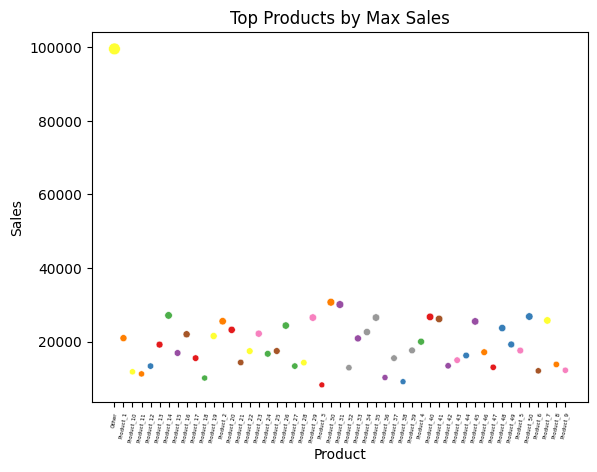

In [803]:
top_products_df = top_products.reset_index()

sns.scatterplot(data=top_products_df, x='Product',
                                      y='Sales', 
                                      hue='Sales',
                                      palette='Set1', 
                                      size='Sales',
                                     legend=False)
plt.xticks(fontsize=4)
plt.xticks(rotation=80)
plt.title('Top Products by Max Sales')
plt.show()

From this graph and the sorted sum value, we can see that, despite the 'Other' missing value, product['30','31','14','50','40'] indicated a really good performance
among those 5 regions, on the opposite, product['3','38','18','36','11'] indicate a not very good performance

In [796]:
# for the lowest selling part
low_5 = ['Region_5', 'Region_7','Region_3','Region_6','Region_1'] 

In [792]:
low_df2 = df2[df2['Region'].isin(low_5)]

In [797]:
low5_df2 = low_df2.groupby('Product')['Sales'].sum().sort_values(ascending=False).reset_index()

In [808]:
print(low5_df2)

       Product         Sales
0        Other  44917.970046
1   Product_41  20576.566000
2   Product_30  15782.404727
3   Product_20  13953.185833
4   Product_35  11945.221057
5   Product_14  11566.410022
6   Product_40  11495.106218
7   Product_48  10907.430000
8   Product_31   9651.670000
9   Product_15   9617.925714
10  Product_29   9529.100578
11  Product_43   9066.981123
12  Product_19   9013.950000
13   Product_1   8743.031429
14  Product_46   8610.278750
15  Product_11   8018.213048
16   Product_9   7807.515630
17   Product_6   7423.073711
18  Product_17   7339.494710
19  Product_13   7177.889410
20  Product_49   6910.060000
21  Product_28   6833.285956
22  Product_16   6618.080588
23  Product_18   6592.003077
24   Product_5   6572.742002
25  Product_44   6410.148571
26  Product_21   6396.247119
27  Product_45   6295.808053
28  Product_47   6287.681516
29   Product_2   6216.589375
30  Product_39   6149.468988
31  Product_50   6082.499844
32  Product_25   5974.370000
33  Product_10

In [813]:
low5_df22 = low_df2.groupby('Product')['Sales'].sum().sort_values(ascending=True).reset_index()

In [814]:
print(low5_df22)

       Product         Sales
0    Product_3     52.710000
1   Product_38   1621.790912
2   Product_26   2551.842727
3   Product_22   2712.906385
4   Product_12   3132.540000
5   Product_37   3221.182222
6    Product_8   3280.730000
7   Product_42   3812.797500
8    Product_4   3871.197731
9   Product_32   4543.385000
10  Product_27   4764.632198
11  Product_33   4852.060033
12  Product_36   5113.262469
13  Product_24   5220.910000
14   Product_7   5252.518571
15  Product_23   5486.488261
16  Product_34   5703.796151
17  Product_10   5969.368571
18  Product_25   5974.370000
19  Product_50   6082.499844
20  Product_39   6149.468988
21   Product_2   6216.589375
22  Product_47   6287.681516
23  Product_45   6295.808053
24  Product_21   6396.247119
25  Product_44   6410.148571
26   Product_5   6572.742002
27  Product_18   6592.003077
28  Product_16   6618.080588
29  Product_28   6833.285956
30  Product_49   6910.060000
31  Product_13   7177.889410
32  Product_17   7339.494710
33   Product_6

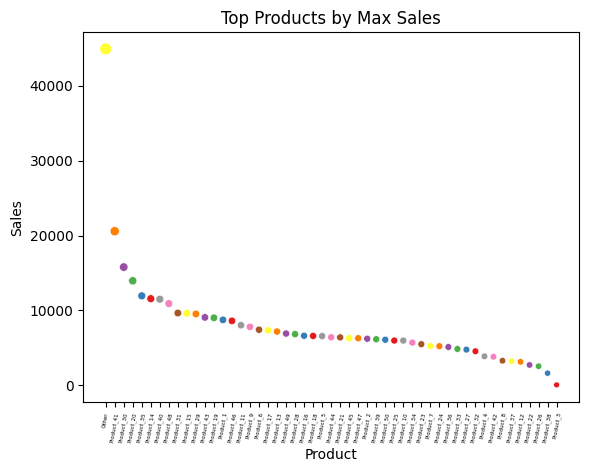

In [812]:
top_products = low5_df2.groupby('Product')['Sales'].max()

sns.scatterplot(data=top_products_df, x='Product',
                                      y='Sales', 
                                      hue='Sales',
                                      palette='Set1', 
                                      size='Sales',
                                     legend=False)
plt.xticks(fontsize=4)
plt.xticks(rotation=80)
plt.title('Top Products by Max Sales')
plt.show()

From this graph and the sorted sum value, we can see that, despite the 'Other' missing value, product['41','30','20','35','14'] indicated a really good performance
among those 5 regions, on the opposite, product['3','38','26','22','12'] indicate a not very good performance

Final Summary

1) What conclusions can you draw about sales performance of various products and regions?

Based on my analysis, I can conclude that, Among those regions, Region ['9', '8', '4', '10', '2', 'Other'] has the relatively higher total product sales amount in a descending orde compare to Region['5', '7', '3', '6', '1'].
For the product part, Product['30', '31', '14', '50','40'] made a very good performance in the Region ['9', '8', '4', '10', '2', 'Other'], on the opposite, product['3', '38', '18', '36','11'] did a relatively bad performance in these regions. Product['41', '30', '20', '35', '14']indicated a really good performance in the region['5', '7', '3', '6', '1'], Product['3', '38', '26', '22', '12']did a relatively bad performance in these regions.

2) What recommendations do you have for the business?

Based on my prior answer, I will suggest the enterprise increase the selling of products ['30', '31', '14', '50','40'] in Region['9', '8', '4', '10', '2', 'Other'], because they denote a relatively high performance among all products selling in these regions, which represent a high sales. Also, Region['9', '8', '4', '10', '2', 'Other'] plays a high performance with relatively large total product sales among the entire regions, denoting that they have high potential to attract more product selling in the next session, so the enterprise should focus on increasing the sales of these products. Vice versa, because Product['3', '38', '18', '36','11']  denotes a relatively low performance among all products selling in these regions, represents low sales, the enterprise can decide to reduce the selling of these products for better performance in these regions.

For Region ['5', '7', '3', '6', '1'], because they did not perform so well in their total product selling, the enterprise should enhance their performance by increasing the selling of Product['41', '30', '20', '35', '14] for next section because they denote high sales. On the opposite, it should reduce the supply of Product ['3', '38', '26', '22','12'] for the next section which denotes low sales.



3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

